In [1]:
############################################
#### UT Course 5 Task 3 - Classification ###
############################################

#imports: numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#import estimators:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#import: model matrices
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#import: cross validation
from sklearn.model_selection import train_test_split

In [2]:
#import cleaned data from Task 5.2
rawData = pd.read_csv('cleaned_credit_data.csv')

In [3]:
### Clean up the data
#rawData['age_by_decade'] = rawData['age_by_decade'].astype('category')
rawData = rawData.drop(['Unnamed: 0'], axis = 1)


In [4]:
#rawData information
rawData.info()
#rawData.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29203 entries, 0 to 29202
Data columns (total 21 columns):
LIMIT_BAL    29203 non-null int64
SEX          29203 non-null int64
EDUCATION    29203 non-null int64
MARRIAGE     29203 non-null int64
AGE          29203 non-null int64
PAY_0        29203 non-null int64
PAY_2        29203 non-null int64
PAY_3        29203 non-null int64
PAY_4        29203 non-null int64
PAY_5        29203 non-null int64
PAY_6        29203 non-null int64
BILL_AMT2    29203 non-null int64
BILL_AMT4    29203 non-null int64
BILL_AMT6    29203 non-null int64
PAY_AMT1     29203 non-null int64
PAY_AMT2     29203 non-null int64
PAY_AMT3     29203 non-null int64
PAY_AMT4     29203 non-null int64
PAY_AMT5     29203 non-null int64
PAY_AMT6     29203 non-null int64
default      29203 non-null int64
dtypes: int64(21)
memory usage: 4.7 MB


In [5]:
################# This is where I start the classification part of the exercise ##########################
# estimators & reporting tools
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import model_selection

In [6]:
# Let's take a look at the current dataset
rawData.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT2,BILL_AMT4,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,3102,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,1725,3272,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14027,14331,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,48233,28314,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,5670,20940,19131,2000,36681,10000,9000,689,679,0


In [7]:
# dependent variable
y = rawData['default']
X = rawData
X = rawData.drop(['default'], axis = 1)

In [8]:
# First thing is to perform OneHotEncoding to get data type out of categories and into numerical


#get rid of negative values for PAY
X.PAY_0 = X.PAY_0 +2
X.PAY_2 = X.PAY_2 +2
X.PAY_3 = X.PAY_3 +2
X.PAY_4 = X.PAY_4 +2
X.PAY_5 = X.PAY_5 +2
X.PAY_6 = X.PAY_6 +2
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29203 entries, 0 to 29202
Data columns (total 20 columns):
LIMIT_BAL    29203 non-null int64
SEX          29203 non-null int64
EDUCATION    29203 non-null int64
MARRIAGE     29203 non-null int64
AGE          29203 non-null int64
PAY_0        29203 non-null int64
PAY_2        29203 non-null int64
PAY_3        29203 non-null int64
PAY_4        29203 non-null int64
PAY_5        29203 non-null int64
PAY_6        29203 non-null int64
BILL_AMT2    29203 non-null int64
BILL_AMT4    29203 non-null int64
BILL_AMT6    29203 non-null int64
PAY_AMT1     29203 non-null int64
PAY_AMT2     29203 non-null int64
PAY_AMT3     29203 non-null int64
PAY_AMT4     29203 non-null int64
PAY_AMT5     29203 non-null int64
PAY_AMT6     29203 non-null int64
dtypes: int64(20)
memory usage: 4.5 MB


In [9]:
# Split Data #
# Split the data into train/test - 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=333)

In [10]:
### Random Forrest ###
# adjusted n_estimators - optimal was 15, max_depth optimal was 4
rf = RandomForestClassifier(n_estimators = 15, max_depth = 4, random_state = 333)
rf.fit(X_train, y_train)
rf_ypred = rf.predict(X_test)
print('Accuracy of random foreest classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))

Accuracy of random foreest classifier on test set: 0.83


In [11]:
### Logistic Regression ###
# adjusted max_iter with no effect, penalty did have an effect with optimal being l1 instead of default l2
logreg = LogisticRegression(penalty='l1', random_state=333)
logreg.fit(X_train, y_train)
log_ypred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

C:\Users\Jeremy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of logistic regression classifier on test set: 0.82


In [12]:
### KNN Regression ###
# adjusted n_neighbors & algorithm -- n_neighbors of 20 raised it from .78 to .79, algorithm had no effect
knn = KNeighborsClassifier(n_neighbors=20, algorithm='auto')
knn.fit(X_train, y_train)
log_yknn = knn.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.79


In [13]:
# Setup all models -- I did this manually above. 
outcome = []
model_names = []
models = [('RF', RandomForestClassifier(n_estimators = 15, max_depth = 4, random_state = 333)), 
          ('LR', LogisticRegression(penalty='l1', random_state=333, solver='liblinear')), 
          ('KNN', KNeighborsClassifier(n_neighbors=20, algorithm='auto'))]

In [14]:
# this for loop will use k-fold validation to evaluate each algorithm with a 10-fold cross validation
random_seed = 333
for model_name, model in models:
    k_fold_validation = model_selection.KFold(n_splits=10, random_state=random_seed)
    results = model_selection.cross_val_score(model, X, y, cv=k_fold_validation, scoring='accuracy')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| Mean=%f STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)

RF| Mean=0.823684 STD=0.014000
LR| Mean=0.814643 STD=0.013222
KNN| Mean=0.784132 STD=0.016645


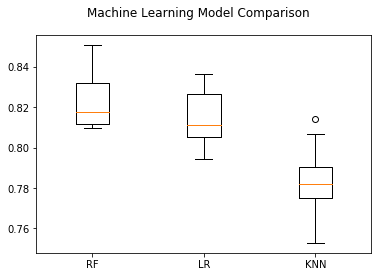

In [15]:
# Plot the results of the models against each other
fig = plt.figure()
fig.suptitle('Machine Learning Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome)
ax.set_xticklabels(model_names)
plt.show()

In [19]:
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT2', 'BILL_AMT4',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6'],
      dtype='object')

In [20]:
#Rename columns for better reporting
X.columns = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'SEPT_DEFAULT', 'AUG_DEFAULT', 'JULY_DEFAULT', 
            'JUNE_DEFAULT', 'MAY_DEFAULT', 'APRIL_DEFAULT', 'BILL_AMT2', 'BILL_AMT4', 'BILL_AMT6',
            'SEPT_PAID', 'AUG_PAID', 'JULY_PAID', 'JUNE_PAID', 'MAY_PAID', 'APRIL_PAID']

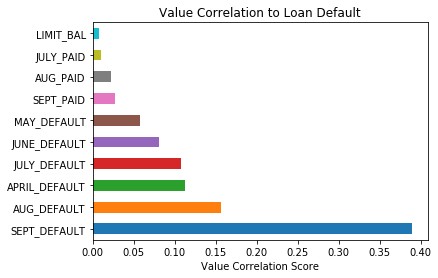

In [23]:
#Plot feature importance of the best model - Random Forsest
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.xlabel("Value Correlation Score")
plt.title("Value Correlation to Loan Default")
plt.show()